three pairs of classifiers:

naive bayes : decision trees

logistic regression : decision rules

SVM : kNN

In [21]:
import numpy as np
from pandas.core.common import random_state
from sklearn.datasets import make_blobs, make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier



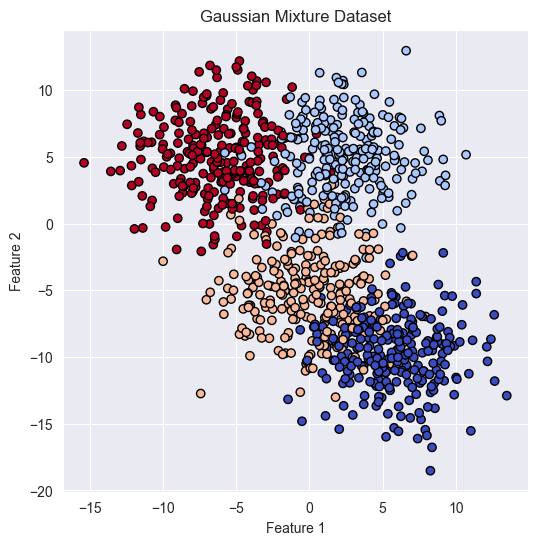

In [64]:
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=10, cluster_std=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Gaussian Mixture Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [65]:
def show_decision_boundary(X, y, model, title='Decision Boundary'):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
    
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.contourf(xx, yy, z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.show()
    
    
    

Gaussian Naive Bayes Accuracy: 0.91
Decision Tree Accuracy: 0.85


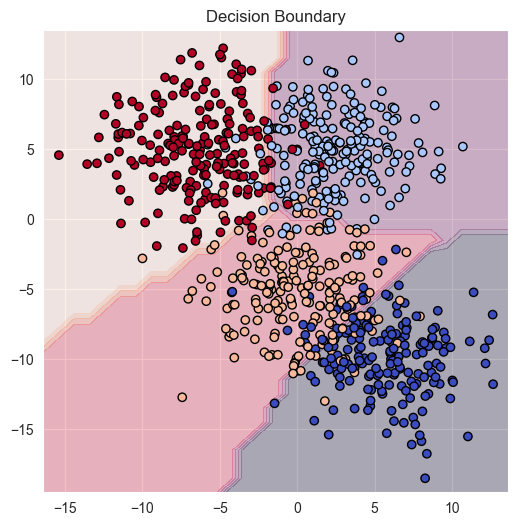

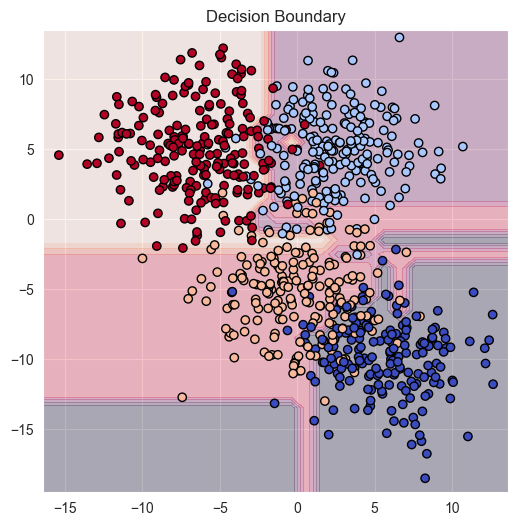

In [66]:
gnb = GaussianNB()
tree = DecisionTreeClassifier()

y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'Gaussian Naive Bayes Accuracy: {accuracy_gnb:.2f}')

y_pred_tree = tree.fit(X_train, y_train).predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.2f}')


show_decision_boundary(X_train, y_train, gnb)
show_decision_boundary(X_train, y_train, tree)


In [67]:
confusion_matrix(y_test, y_pred_gnb)

array([[58,  0,  6,  0],
       [ 0, 35,  0,  1],
       [ 7,  2, 43,  1],
       [ 0,  2,  0, 45]])

In [68]:
confusion_matrix(y_test, y_pred_tree)

array([[57,  0,  7,  0],
       [ 0, 33,  1,  2],
       [ 8,  5, 39,  1],
       [ 0,  5,  0, 42]])

We can see here that the Gaussian Naive Bayes classifier is more accurate than the Decision Tree classifier. This performance difference increases the more the features overlap and the more noise is added. This is because the synthetic data is created such that the decision boundary is more fuzzy with cluster overlap. Because all the features are linearly independent, which supports the assumption of naive bayes, it performs well on this data, while decision trees tend to overfit 

1.0
1.0
